In [137]:
import pandas as pd
import numpy as np
import seaborn as sb
import autoreload
import missingno as msno
import matplotlib.pyplot as plt
import os
import sys
import csv

from collections import defaultdict, Counter

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')
sb.set()


In [110]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Product Tweets Dataset\final_data.csv")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [118]:
col, rows = df.shape
print(f'columns - {col} & rows - {rows}')

columns - 9093 & rows - 3


In [112]:
df.rename(columns = {'emotion_in_tweet_is_directed_at': 'device', 
           'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace = True)

In [113]:
df.head()

,tweet_text,device,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [114]:
df['emotion'] = df['emotion'].str.replace('Negative emotion', 'Negative')
df['emotion'] = df['emotion'].str.replace('Positive emotion', 'Positive')
df['emotion'] = df['emotion'].str.replace('No emotion toward brand or product', 'Null')
df.head()

,tweet_text,device,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [115]:
df.sample()

,tweet_text,device,emotion
4327,iPad DJ @mention on the decks @mention for @me...,NaN,Null


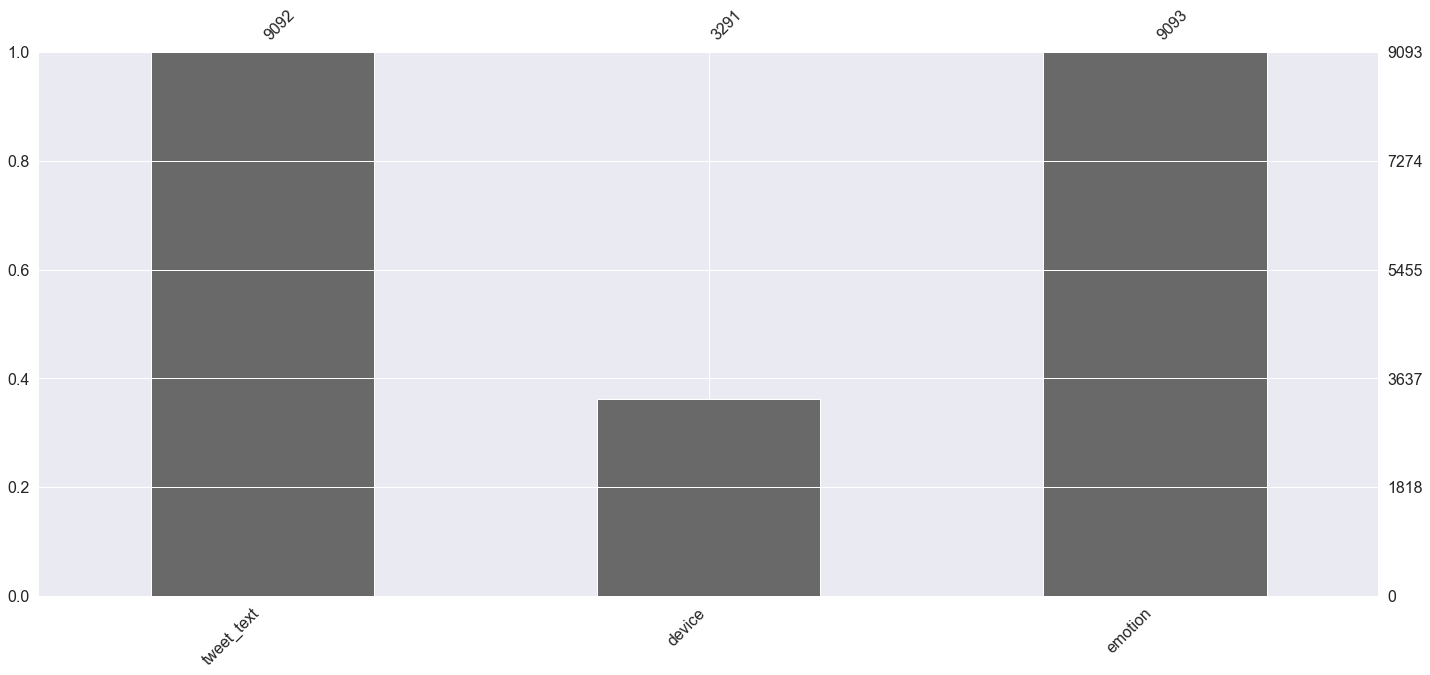

In [116]:
msno.bar(df)

In [119]:
df['device'] = df['device'].str.replace(',', '')

In [120]:
df['device'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: device, dtype: int64

In [121]:
df2 = df.copy()

In [122]:
df2.head()

,tweet_text,device,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [123]:
df2.dropna(axis = 'index', how = 'any', inplace = True)

In [124]:
df2.shape

(3291, 3)

In [125]:
df2.to_csv(r"D:\Open Classroom\Datasets\Product Tweets Dataset\final_data_dropped.csv")

In [126]:
df2 = pd.read_csv(r"D:\Open Classroom\Datasets\Product Tweets Dataset\final_data_dropped.csv")
df2.drop(columns = ['Unnamed: 0'], inplace = True)
df2.head()

,tweet_text,device,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [127]:
df2.shape

(3291, 3)

['iPad', 'Apple', 'iPad or iPhone App', 'Google', 'iPhone', 'Other Google product or service', 'Android App', 'Android', 'Other Apple product or service'] [946, 661, 470, 430, 297, 293, 81, 78, 35]


Text(0.5, 1.0, 'Device Popularity on Twitter')

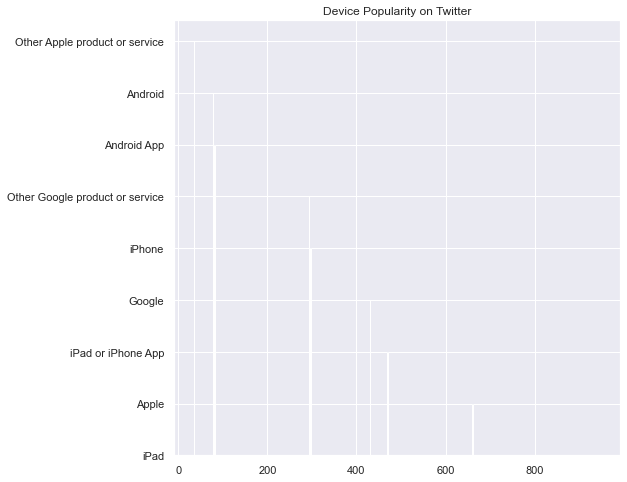

In [136]:

with open(r"D:\Open Classroom\Datasets\Product Tweets Dataset\final_data_dropped.csv", encoding='utf-8') as file:
    file_reader = csv.DictReader(file)
    file_counter = Counter()
    
    
    for i in file_reader:
        file_counter[i['device']] += 1
        
        
device = []
dev_count = []

for j in file_counter.most_common():
    device.append(j[0])
    dev_count.append(j[1])
        
print(device, dev_count)

plt.figure(figsize = (8, 8))
plt.bar(dev_count, device)
plt.title('Device Popularity on Twitter')

In [129]:
df['device'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: device, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   device      3291 non-null   object
 2   emotion     9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
